<a href="https://colab.research.google.com/github/VamsiMaruturi/VITBML-EDA3/blob/master/VAMSI_NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment
In this assignment you will learn to do some data cleaning, prepare your features and do some K Means clustering on the data.

[Download data from here](https://drive.google.com/open?id=1ozz0zITDG8wOSQtwop2NC7AM_T3O59nj)

Load it as a pandas dataframe


In [0]:
import numpy as np
import pandas as pd

df=pd.read_csv(filepath_or_buffer='/content/amazon_co-ecommerce_sample.csv',engine='python',encoding="utf-8")


We are interested in customer_reviews column. However, the column is not clean data. It contains review title, rating, date, customer name, and review all in one scell separated by //

[Read this tutorial](https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/)

Extract the customer reviews in another dataframe and separate each of the components


In [0]:
new_df=df['customer_reviews']
df.dropna(inplace = True) 
new=new_df.str.split("//", n = 3, expand = True) 
temp=new[3]
l=[]
for i in list(temp):
  if type(i)!=str:
    i=np.float("nan")
  l.append(i)
new[3]=l
new=new.dropna()

Now the customer name column needs to be cleaned. Extract only the customer name and remove the By and on part in similar manner. This time you need to split by '\n'

In [3]:
name=[]
for i in list(new[3]):
  start = i.find("By\n \n    \n    ")+len("By\n \n    \n    ")
  end = i.find("\n  \n")
  a=i[start:end]
  if len(a)>80:

    a=np.float('nan')
  name.append(a)
new["Name"]=name
new=new.dropna()
new

,0,1,2,3,Name
0,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By\n \n Copnovelist\n \n on 6 April 20...,Copnovelist
1,Four Stars,4.0,18 Dec. 2015,By\n \n kenneth bell\n \n on 18 Dec. 2...,kenneth bell
2,**Highly Recommended!**,5.0,26 May 2015,By\n \n Simon.B :-)\n \n on 26 May 201...,Simon.B :-)
3,I love it,5.0,22 July 2013,By\n \n Lilla Lukacs\n \n on 22 July 2...,Lilla Lukacs
4,Birthday present,5.0,14 April 2014,By\n \n Love my Dog\n \n on 14 April 2...,Love my Dog
...,...,...,...,...,...
9995,Realistic,5.0,31 Mar. 2014,By\n \n Ray\n \n on 31 Mar. 2014 // Ve...,Ray
9996,... what I see my grandson us going to have fu...,4.0,9 Dec. 2014,By\n \n Janet R.\n \n on 9 Dec. 2014 /...,Janet R.
9997,Five Stars,5.0,18 Dec. 2015,By\n \n Amazon Customer\n \n on 18 Dec...,Amazon Customer
9998,The best sculpt in a while,5.0,13 May 2010,By\n \n Sodam Yat\n \n on 13 May 2010 ...,Sodam Yat


Create another column nlpreview and copy the review column as it is
apply removal of punctuation and extract all words as a list of words. 

**Hint**: You may have to use [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) on dataframe series with a lambda function that does your tokenization etc. You can use sentence/word tokenizer but you will get extra credit if you use RegExpTokenizer. [Documentation for help](https://kite.com/python/docs/nltk.tokenize)

In [4]:
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
new_words=[]
for i in list(new[0]):
  tokenizer = nltk.RegexpTokenizer(r"\w+")
  a= tokenizer.tokenize(i)
  new_words.append(a)
new['tokenized_words']=new_words


*Remove* stopwords in the nlpreview column

In [5]:
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer

wordnet_lematizer = WordNetLemmatizer()
filtered_words=[]
lem_words=[]
reviews=[]
for i in list(new['tokenized_words']):
  stop_words = set(stopwords.words('english')) 
  lower_words=[]
  for j in i:
    lower_words.append(j.lower())
  filtered_sentence = [w for w in lower_words if not w in stop_words] 
  filtered_sentence = []
  filtered_word=[] 
  for w in lower_words: 
    if w not in stop_words: 
        filtered_sentence.append(w)
  filtered_words.append(filtered_sentence)
  lem_sentence=[]
  for word in filtered_sentence:
    lem_sentence.append(wordnet_lematizer.lemmatize(word))
  lem_words.append(lem_sentence)
  reviews.append(" ".join(lem_sentence))
new['filtered_words']=filtered_words
new["lemmatized_words"]=lem_words

new.head(10)
review_total= "".join(reviews)
review_total
new["reviews"]=reviews

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Use stemming/lemmatization. There are several options, so [read the docs](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python).

Find the first 100 most important words, i.e. most frequently used words and plot them using FreqDist plot in nltk. See the sample colab file given during class. Note your observations.

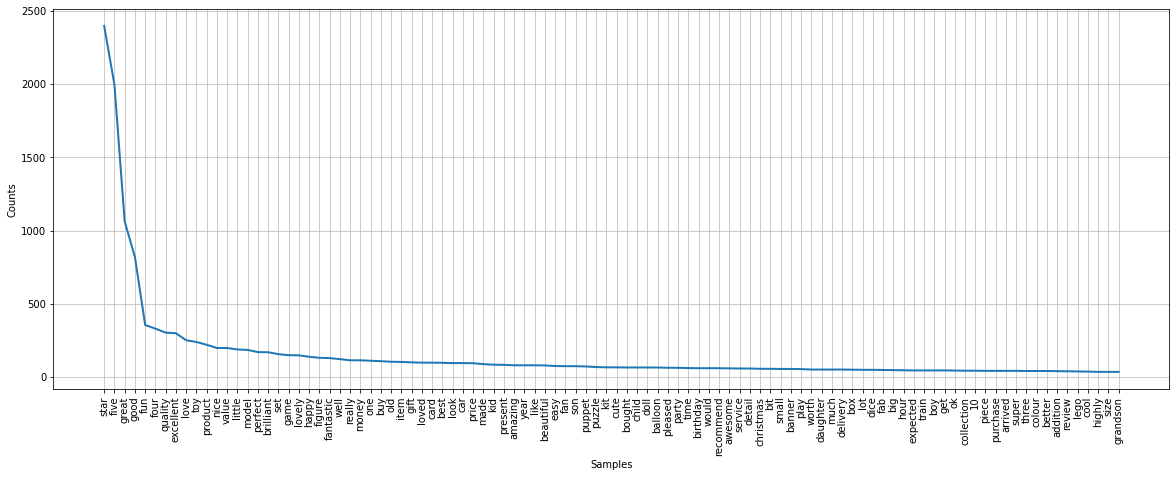

In [6]:
# your code here
words=[]
for i in list(new['lemmatized_words']):
  for j in i:
    words.append(j)
words 
from matplotlib import pyplot as plt
from nltk.probability import FreqDist
fdist = FreqDist(words)
plt.figure(figsize=(20,7))
fdist.plot(100,cumulative=False)

Create another column called TFIDF and use the nlpreview to construct tfidf in this newly created column

In [0]:
# your code 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
word_count_vector=cv.fit_transform(reviews)
word_count_vector.shape

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"])
# sort ascending
df_idf.sort_values(by=['idf_weights'])
# count matrix
count_vector=cv.transform(reviews)
# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector)

feature_names = cv.get_feature_names()
first_document_vector=tf_idf_vector[0]

new_word_count_vector=cv.transform([review_total])
tf_idf_new_vector = tfidf_transformer.transform(new_word_count_vector)
df_vector = pd.DataFrame(tf_idf_new_vector.T.todense(), index=feature_names, columns=["tfidf"])
tfidf_top_100 = df_vector.sort_values(by=["tfidf"],ascending=False)


new_word_count_vector=cv.transform([review_total])
tf_idf_new_vector = tfidf_transformer.transform(new_word_count_vector)
df_vector = pd.DataFrame(tf_idf_new_vector.T.todense(), index=feature_names, columns=["tfidf"])
tfidf_top_100 = df_vector.sort_values(by=["tfidf"],ascending=False)



Find the top 100 words with maximum TF IDF score and plot it. Note your observations and see how different it is from the Top 100 highest frequency words.

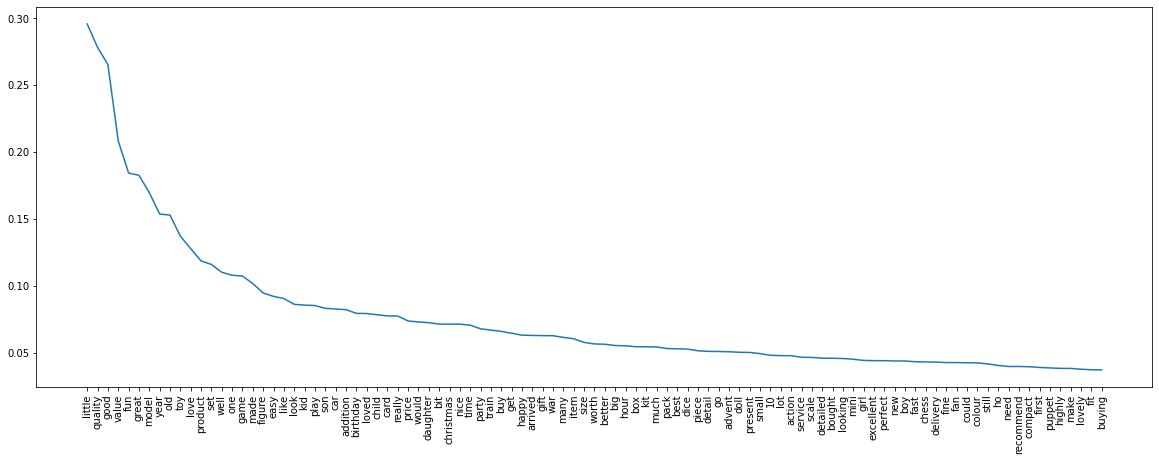

In [8]:
tfidf_scores=list(tfidf_top_100["tfidf"])[:99]
tfidf_words=list(tfidf_top_100.index)[:99]
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
plt.plot(tfidf_words,tfidf_scores)

Use KMeans clustering to apply clustering to this TFIDF column. Find optimal number of clusters using elbow plot and note your observations for the optimal clusters.

In [0]:
from sklearn.cluster import KMeans
#k_means = [KMeans(n_clusters=i,random_state=0) for i in range(2,31)]
#score = [k_means[i].fit(tf_idf_vector).score(tf_idf_vector) for i in range(29)]
#plt.plot(range(2,31),score)
#plt.xlabel('Number of Clusters')
#plt.ylabel('Score')
#plt.title('Elbow Curve')
#plt.show()

In [11]:
k_means_5 = KMeans(n_clusters=8,random_state=0)
k_means_5.fit(tf_idf_vector)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

# visualize your clusters
 Let us use word cloud visualization.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plotwordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 
  plt.figure(figsize=(20, 7)) 
  plt.imshow(wordcloud, interpolation="bilinear") 
  plt.axis('off') 
  plt.show()

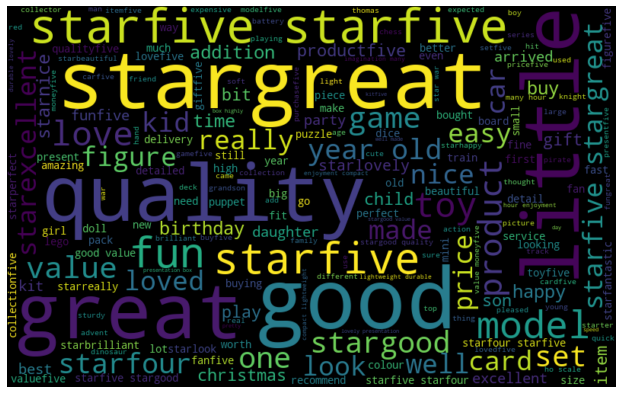

In [13]:
# your code here to call plotwordcloud for concatenated word set of each cluster. You need to find all words of a cluster and create a set.
plotwordcloud(review_total)

#Sentiment Analysis
Ideally it is difficult to do sentiment analysis without having labeled data.

We can do following:
1. Use the rating column and rate 1,2 as negative and 4,5 as positive and reject 3 for now. Then we do 70/30 split of our data into train/test set 
2. Use a lexicon of positive and negative words and calculate score of each review using high score for positive and low score for negative review and pick a threshold above which a review is positive. We can find known positive or negative words in a review and sum their scores up to get a final score.

However, note that text is tricky:

E.g. consider a sentence in review of a smart watch: *The product is not only good but also does not spoil in water.*

It is a positive review but has lot of negaive words not, spoil etc. In these cases one has to go for bi or tri grams, e.g. *not only good* is a positive trigram. *does not spoil* is another one. However adding trigrams make your problem tough. If a review has 10 words, it will have 7 trigrams and 8 bigrams in it, making the features more.


In [14]:
# create a column sentiment with 0 meaning negative and 1 meaning positive and construct this based on the rule in point 1 above.
a=[]
for i in list(new[1]):
  if i in [' 1.0 ',' 2.0 ']:
    a_i=0
  elif i in [' 4.0 ',' 5.0 ']:
    a_i=1
  else:
    a_i=np.float("nan")
  a.append(a_i)
new["class"]=a
new=new.dropna()
new.head(10)

,0,1,2,3,Name,tokenized_words,filtered_words,lemmatized_words,reviews,class
0,Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By\n \n Copnovelist\n \n on 6 April 20...,Copnovelist,"[Worth, Buying, For, The, Pictures, Alone, As,...","[worth, buying, pictures, alone, ever]","[worth, buying, picture, alone, ever]",worth buying picture alone ever,1.0
1,Four Stars,4.0,18 Dec. 2015,By\n \n kenneth bell\n \n on 18 Dec. 2...,kenneth bell,"[Four, Stars]","[four, stars]","[four, star]",four star,1.0
2,**Highly Recommended!**,5.0,26 May 2015,By\n \n Simon.B :-)\n \n on 26 May 201...,Simon.B :-),"[Highly, Recommended]","[highly, recommended]","[highly, recommended]",highly recommended,1.0
3,I love it,5.0,22 July 2013,By\n \n Lilla Lukacs\n \n on 22 July 2...,Lilla Lukacs,"[I, love, it]",[love],[love],love,1.0
4,Birthday present,5.0,14 April 2014,By\n \n Love my Dog\n \n on 14 April 2...,Love my Dog,"[Birthday, present]","[birthday, present]","[birthday, present]",birthday present,1.0
5,Five Stars,5.0,27 Dec. 2014,By\n \n catherine baines\n \n on 27 De...,catherine baines,"[Five, Stars]","[five, stars]","[five, star]",five star,1.0
6,"High standard model, well worth the wait. Repl...",5.0,3 Oct. 2014,By\n \n Steve Guess\n \n on 3 Oct. 201...,Steve Guess,"[High, standard, model, well, worth, the, wait...","[high, standard, model, well, worth, wait, rep...","[high, standard, model, well, worth, wait, rep...",high standard model well worth wait replaces,1.0
7,Beautiful set,5.0,3 Dec. 2015,By\n \n Adam Irwin\n \n on 3 Dec. 2015...,Adam Irwin,"[Beautiful, set]","[beautiful, set]","[beautiful, set]",beautiful set,1.0
8,Five Stars,5.0,23 Dec. 2015,By\n \n Mr. K. Waller\n \n on 23 Dec. ...,Mr. K. Waller,"[Five, Stars]","[five, stars]","[five, star]",five star,1.0
9,Chuggers are go!,4.0,11 Jan. 2011,By\n \n J. Negus\n \n on 11 Jan. 2011 ...,J. Negus,"[Chuggers, are, go]","[chuggers, go]","[chuggers, go]",chuggers go,1.0


Read [this stack overflow post](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data). It tells you how to create you train and test data.

In [0]:
# shuffle and split your data in train test (70/30) with tfidf as your features and sentiment as your labels
import random
data=[]
for i in range(new.shape[0]):
  data.append((new.iloc[i,8],new.iloc[i,9]))
random.shuffle(data)

POSITIVE DATA WORDCLOUD


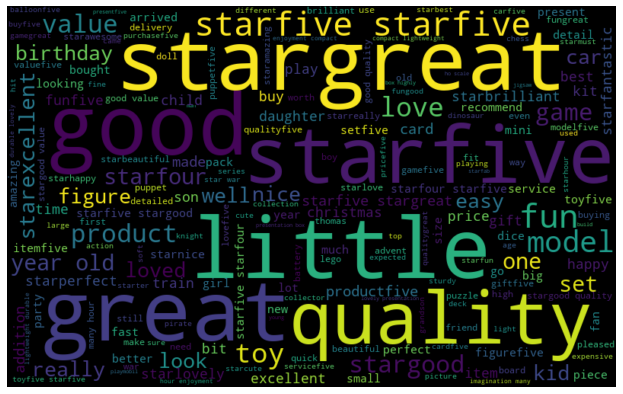

NEGATIVE DATA WORDCLOUD


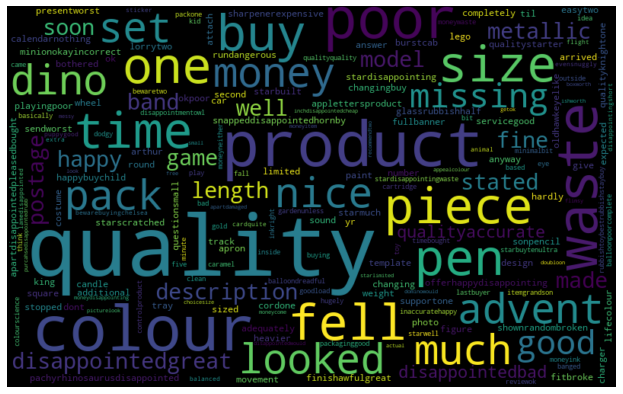

In [16]:
# plot word clourds for positive and negative training examples
positive_data,negative_data=[],[]
for (d,c) in data:
  if c == 1:
    positive_data.append(d)
  elif c==0:
    negative_data.append(d)
positive_data="".join(positive_data)
negative_data="".join(negative_data)
print("POSITIVE DATA WORDCLOUD")
plotwordcloud(positive_data)
print("NEGATIVE DATA WORDCLOUD")
plotwordcloud(negative_data)

In [17]:
# use and supervised classification approach of your choice and report your accuracy

word_features = list(tfidf_top_100.index)[:1000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features
featuresets = [(document_features(d), c) for (d,c) in data]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.98


Evaluate your model by trying your own reviews.

Process will be:
1. Calculate tf-idf of the review using [transform() method](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data)
2. run your model on the tf-idf vector and see the sentiment predicted.

In [33]:
# try your model on new data ie. your own cooked up data say some review that you write
own_review=["Great product"]
new_count_vector=cv.transform(own_review)
tf_new_vector = tfidf_transformer.transform(new_count_vector)
df_vec= pd.DataFrame(tf_new_vector.T.todense(), index=feature_names, columns=["tfidf"])
tfidf_features = df_vec.sort_values(by=["tfidf"],ascending=False)
doc_own = document_features(own_review)
classifier.classify(doc_own)

1.0

GROUP MEMBERS:
*   M.V.P.VAMSI-19PA1A05I8
*   S.AJITH KUMAR-19PA1A05G9
*   T.RAJ PRANAV-19PA1A05H3
*   G.ABHISHEK-19PA1A0548
*   CH.MAHESH-19PA1A0534

